# Feature Engineering

To create the multi-feature CNN-LSTM model, I carried out a feature engineering process by comparing the performance of different assets on the market using Pearson correlation

## Libraries

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data

In [134]:
target = ['HRC=F']

features = ['000001.SS', '^DJI', '^N225','^NSEI', '^SPX', '^STOXX', 
            'EXV5.DE', 'ITA', 'ITB',
            'SHV', 'TLT',
            'CNY=X', 'DX-Y.NYB', 'EUR=X',
            'CL=F', 'GC=F', 'HG=F', 'NG=F', 'PL=F']

In [135]:
tickers = (target + features)

In [136]:
start_date = '2008-11-01'
end_date = '2018-11-01'

In [137]:
df = yf.download(tickers=tickers, start=start_date, end=end_date)
df = df['Close']
df = df.reindex(columns=tickers)

[*********************100%%**********************]  20 of 20 completed


## Correlation Matrix

In [138]:
correlation_martix = df.corr(method='pearson')

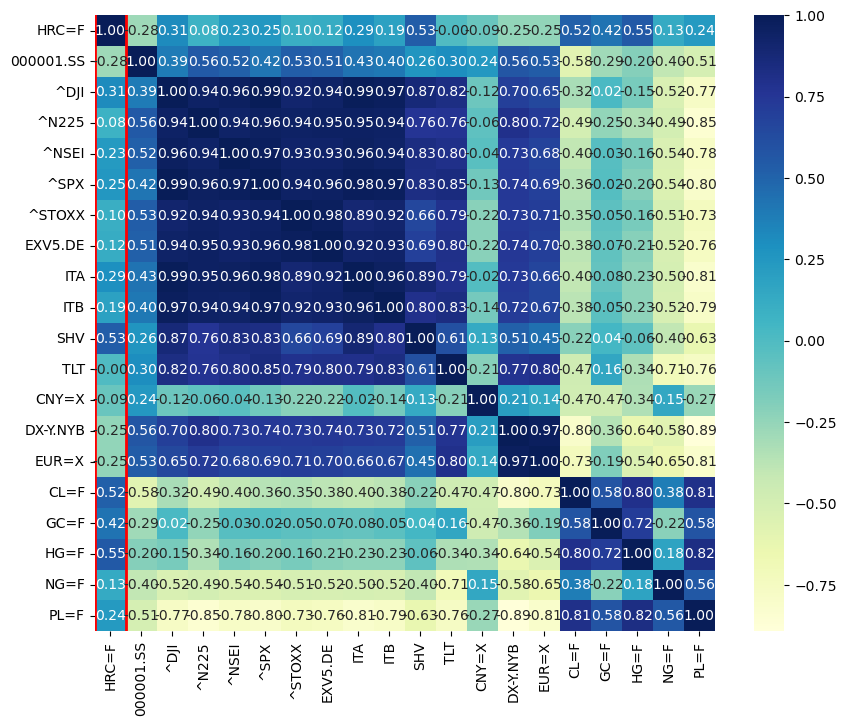

In [139]:
row_index_to_highlight = 0

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(correlation_martix, annot=True, cmap='YlGnBu', fmt='.2f')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.axvline(row_index_to_highlight, color='red', linewidth=2)
plt.axvline(row_index_to_highlight+1, color='red', linewidth=2)
plt.show()

In [140]:
correlation_martix

,HRC=F,000001.SS,^DJI,^N225,^NSEI,^SPX,^STOXX,EXV5.DE,ITA,ITB,SHV,TLT,CNY=X,DX-Y.NYB,EUR=X,CL=F,GC=F,HG=F,NG=F,PL=F
HRC=F,1.000000,-0.280042,0.313042,0.082232,0.234919,0.245889,0.100963,0.116531,0.291488,0.192944,0.531716,-0.001493,-0.094732,-0.247159,-0.245035,0.517012,0.424606,0.554920,0.127654,0.237598
000001.SS,-0.280042,1.000000,0.392354,0.556294,0.518627,0.420487,0.531968,0.513798,0.426099,0.401325,0.264270,0.304534,0.243760,0.564632,0.534577,-0.580681,-0.292640,-0.203431,-0.400916,-0.505092
^DJI,0.313042,0.392354,1.000000,0.942155,0.964496,0.994079,0.917432,0.935891,0.988671,0.971578,0.870467,0.823642,-0.116437,0.700166,0.650243,-0.317649,0.018237,-0.153579,-0.523344,-0.774195
^N225,0.082232,0.556294,0.942155,1.000000,0.940421,0.958675,0.943141,0.954550,0.950006,0.944967,0.757537,0.763956,-0.061004,0.799866,0.719175,-0.487299,-0.245852,-0.338426,-0.489611,-0.847779
^NSEI,0.234919,0.518627,0.964496,0.940421,1.000000,0.971249,0.933303,0.929917,0.962006,0.936981,0.831702,0.804466,-0.040312,0.727462,0.678416,-0.398087,-0.032208,-0.161382,-0.535264,-0.779783
^SPX,0.245889,0.420487,0.994079,0.958675,0.971249,1.000000,0.943315,0.955254,0.983407,0.972090,0.829849,0.845189,-0.126223,0.740251,0.691512,-0.361145,-0.021957,-0.204933,-0.539105,-0.801605
^STOXX,0.100963,0.531968,0.917432,0.943141,0.933303,0.943315,1.000000,0.976191,0.893011,0.916344,0.655697,0.786681,-0.218339,0.732739,0.706948,-0.348178,-0.051921,-0.157700,-0.508585,-0.733889
EXV5.DE,0.116531,0.513798,0.935891,0.954550,0.929917,0.955254,0.976191,1.000000,0.923996,0.931081,0.690542,0.801965,-0.218422,0.741773,0.700171,-0.383743,-0.071617,-0.209729,-0.520302,-0.756367
ITA,0.291488,0.426099,0.988671,0.950006,0.962006,0.983407,0.893011,0.923996,1.000000,0.961627,0.891176,0.794575,-0.015324,0.731373,0.660944,-0.397644,-0.080832,-0.233203,-0.501080,-0.811556
ITB,0.192944,0.401325,0.971578,0.944967,0.936981,0.972090,0.916344,0.931081,0.961627,1.000000,0.798553,0.830632,-0.138708,0.723926,0.665711,-0.379500,-0.048990,-0.232588,-0.520320,-0.788677
